Adding libraries needed for task

In [1]:
import random

Assigning master sequence to shakespeare sonnet 84

In [2]:
mas_seq = "who is it that says most which can say more than this rich praise that you alone are you"
mas_seqx = "who is it that says most which can say more than this"
len(mas_seqx)

53

In [3]:
def ham_dis(org, copy):
    if len(org) != len(copy):
        return -1
    count = 0
    for i in range(len(org)):
        if org[i] != copy[i]:
            count = count + 1
    return count

In [4]:
def ran_seq(size: int):
    alphabet = "abcdefghijklmnopqrstuvwxyz "
    seq = ""
    for i in range(size):
        seq += alphabet[random.randint(0,26)]
    return seq
    

In [5]:
def closest_ran(n: int,org):
    size = len(org)
    if n <= 0 or size == 0:
        return -1
    clo_str = ran_seq(size)
    clo_hum = ham_dis(org,clo_str)
    temp = ""
    for i in range(n-1):
        temp = ran_seq(size)
        if ham_dis(org,temp) < ham_dis(org,clo_str):
            clo_str = temp
            clo_hum = ham_dis(org,clo_str)
    return clo_hum,clo_str
        
        
        

In [6]:
def err_copy(example,p):
    alphabet = 'abcdefghijklmnopqrstuvwxyz '
    copy = ''
    for character in example:
        
        if random.random() <= p:
            copy = copy + alphabet[random.randint(0,26)]
        else:
            copy = copy + character
    return copy


In [7]:
def ham_offspring(org,p,n):
    gen = 0
    par_str = ran_seq(len(org))
    off_dis = ham_dis(par_str,org)
    while off_dis != 0:
        gen += 1
        temp = par_str
        dis = ham_dis(par_str,org)
        for i in range(n):
            off_str = err_copy(par_str,p)
            child_dis = ham_dis(off_str,org)
            if child_dis < dis:
                temp = off_str
                dis = child_dis
        par_str = temp
        off_dis = ham_dis(par_str, org)
        #print(par_str,off_dis)
    return gen
            
    
    
    

In [8]:
def ham_offspring_tracker(org,p,n):
    gen = []
    par_str = ran_seq(len(org))
    off_dis = ham_dis(par_str,org)
    while off_dis != 0:        
        temp = par_str
        dis = ham_dis(par_str,org)
        for i in range(n):
            off_str = err_copy(par_str,p)
            child_dis = ham_dis(off_str,org)
            if child_dis < dis:
                temp = off_str
                dis = child_dis
        gen.append(dis)
        par_str = temp
        off_dis = ham_dis(par_str, org)
        #print(par_str,off_dis)
    return gen

In [9]:
ham_offspring_tracker(mas_seq,0.01,50)

[85,
 84,
 84,
 83,
 82,
 81,
 81,
 81,
 80,
 79,
 78,
 78,
 78,
 78,
 77,
 76,
 75,
 75,
 74,
 73,
 73,
 72,
 71,
 70,
 69,
 69,
 68,
 68,
 67,
 66,
 66,
 66,
 65,
 65,
 64,
 63,
 62,
 61,
 61,
 60,
 59,
 58,
 58,
 58,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 56,
 56,
 56,
 55,
 54,
 54,
 54,
 53,
 52,
 52,
 52,
 51,
 50,
 50,
 49,
 48,
 47,
 47,
 47,
 46,
 46,
 45,
 44,
 43,
 43,
 42,
 41,
 40,
 40,
 39,
 39,
 38,
 38,
 37,
 37,
 37,
 36,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 33,
 33,
 33,
 32,
 31,
 31,
 31,
 30,
 30,
 30,
 30,
 30,
 30,
 29,
 28,
 27,
 26,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,


In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def offspr_stat(org,p,n,cals):
    gens = []
    for i in range(cals):
        gens.append(ham_offspring(org,p,n))
    average = sum(gens) // cals
    SD = np.std(gens)
    median = np.median(gens)
    
    return average,SD,median

In [12]:
offspr_stat(mas_seqx,0.05,50,10)

(371, np.float64(98.56779392884879), np.float64(369.5))

In [13]:
p_values = [i * 0.01 for i in range(1, 11)]
gen_need = [[],[],[],[],[]]
for p in p_values:
    for i in range(0,5):
        print(f"Running simulation for p = {p}... for n = {(i + 1) * 10}")
        gen = offspr_stat(
            org=mas_seqx,
            p=p,
            n= (i+1) * 10,
            cals = 5
        )[0]
        gen_need[i].append(gen)


Running simulation for p = 0.01... for n = 10
Running simulation for p = 0.01... for n = 20
Running simulation for p = 0.01... for n = 30
Running simulation for p = 0.01... for n = 40
Running simulation for p = 0.01... for n = 50
Running simulation for p = 0.02... for n = 10
Running simulation for p = 0.02... for n = 20
Running simulation for p = 0.02... for n = 30
Running simulation for p = 0.02... for n = 40
Running simulation for p = 0.02... for n = 50
Running simulation for p = 0.03... for n = 10
Running simulation for p = 0.03... for n = 20
Running simulation for p = 0.03... for n = 30
Running simulation for p = 0.03... for n = 40
Running simulation for p = 0.03... for n = 50
Running simulation for p = 0.04... for n = 10
Running simulation for p = 0.04... for n = 20
Running simulation for p = 0.04... for n = 30
Running simulation for p = 0.04... for n = 40
Running simulation for p = 0.04... for n = 50
Running simulation for p = 0.05... for n = 10
Running simulation for p = 0.05...

In [14]:
gen_need[0]

[2079, 1370, 1869, 1861, 1883, 2902, 4275, 5640, 7695, 12116]

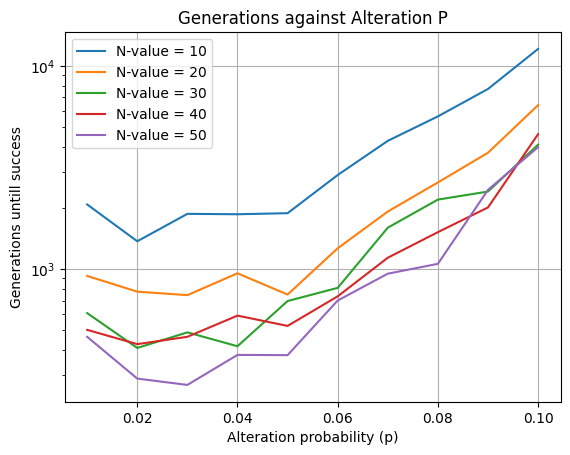

In [15]:
for i in range(0,5):
    plt.semilogy(p_values[:10], gen_need[i], label=f"N-value = {10 * (i + 1)}")
plt.legend()
plt.title("Generations against Alteration P")
plt.xlabel("Alteration probability (p)")
plt.ylabel("Generations untill success")
plt.grid(True)
plt.show()

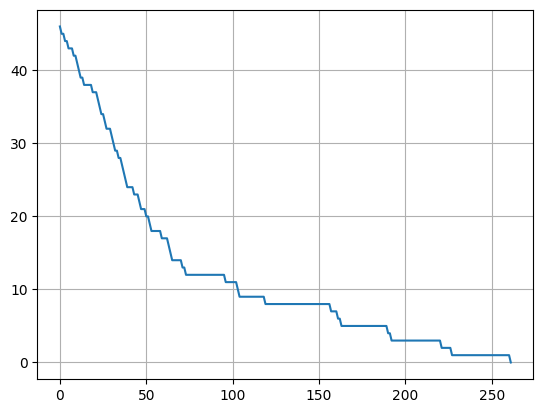

In [16]:
y = ham_offspring_tracker(mas_seqx,0.01,50)
plt.plot(range(len(y)),y)
plt.grid(True)

/tmp/ipykernel_29924/360632778.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


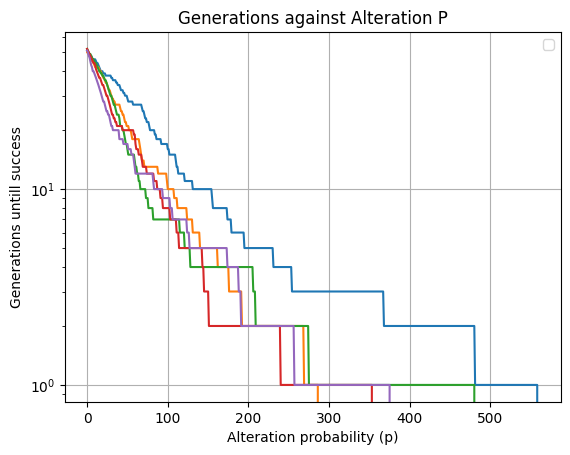

In [17]:
for i in range(1,6):
    y = ham_offspring_tracker(mas_seqx,(i/100),50)
    plt.semilogy(range(len(y)),y)
plt.legend()
plt.title("Generations against Alteration P")
plt.xlabel("Alteration probability (p)")
plt.ylabel("Generations untill success")
plt.grid(True)
plt.show()